In [8]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import  CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score, classification_report
buy=pd.read_csv("buyComputer.csv")
features = buy.columns.tolist()
features.remove('BuyComputer')

In [9]:
encoder1 = OrdinalEncoder()
data_encoded = encoder1.fit_transform(buy[features])
buy_encoded = pd.DataFrame(data_encoded, columns=features)

encoder2 = LabelEncoder()
target_encoded = encoder2.fit_transform(buy['BuyComputer'])
buy_encoded['BuyComputer'] = target_encoded
data_encoded

array([[2., 0., 0., 1.],
       [2., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 2., 0., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 0.],
       [0., 1., 1., 0.],
       [2., 2., 0., 1.],
       [2., 1., 1., 1.],
       [1., 2., 1., 1.],
       [2., 2., 1., 0.],
       [0., 2., 0., 0.],
       [0., 0., 1., 1.],
       [1., 2., 0., 0.]])

In [10]:
from sklearn.tree import DecisionTreeClassifier
myDT = DecisionTreeClassifier(criterion = 'gini', max_depth=3)

In [11]:
myDT.fit(data_encoded, target_encoded)
y_pred = myDT.predict(data_encoded)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0])

In [12]:
from sklearn import metrics
acc = metrics.accuracy_score(target_encoded, y_pred)
print("Accuracy: {:.2f}".format(acc))

Accuracy: 0.86


In [13]:
buy1=pd.read_csv("buyComputer_test.csv")
features = buy1.columns.tolist()
features.remove('BuyComputer')
# note that only transform no fit in the following code
data_encoded = encoder1.transform(buy1[features])
X_test = pd.DataFrame(data_encoded, columns=features)
rrr = myDT.predict(X_test)
rrr

C:\Users\ajen\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1])

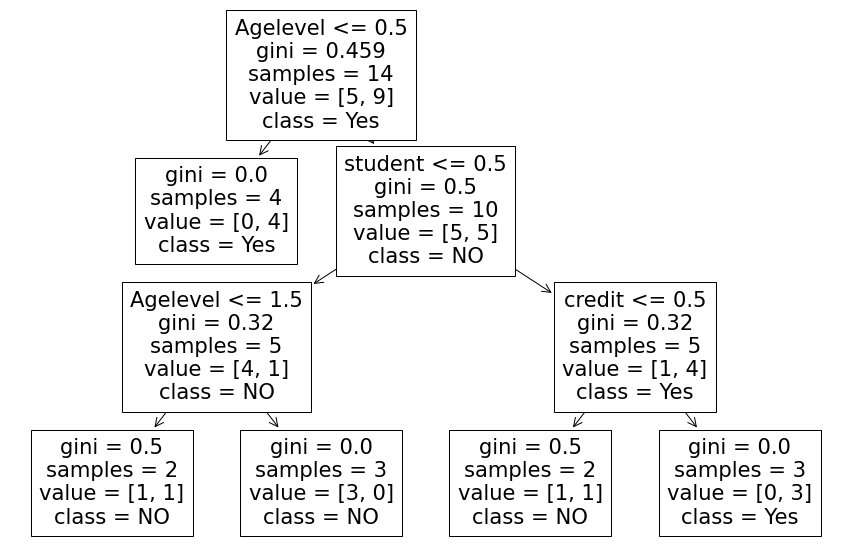

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
A=['NO', 'Yes']
F=['Agelevel','income','student','credit']
plot_tree(myDT, feature_names=F, class_names=A)

plt.show()